**Import libraries**

In [1]:
#Data procsessing and model training
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#SVM
from sklearn.svm import SVC

#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

**Mount Google Drive to access and import CSV file**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CollatedExperimentalDataWithLabels.csv")

Let's check what this dataset contains!

In [4]:
df.head(10) #Show top 10 values from the top

,timestamp,temperature,light_intensity,humidity,CO,NO2,C3H8,C4H1O,CH4,H2,C2H5OH,Label
0,31/3/2021 20:30,38.04,44,43.7,45.776,0.138,144253.219,43698.004,3712474.75,26.214,36.033,0
1,31/3/2021 20:30,38.05,47,44.0,46.467,0.139,144253.219,43698.004,3924157.25,26.617,36.033,0
2,31/3/2021 20:30,37.34,97,45.3,46.005,0.139,139759.906,42539.531,3852371.50,26.617,36.033,0
3,31/3/2021 20:30,37.35,98,45.2,46.005,0.140,136850.125,41786.332,3712474.75,26.214,35.562,0
4,31/3/2021 20:30,37.06,63,45.2,46.467,0.143,135420.266,41047.992,3712474.75,26.214,35.562,0
5,31/3/2021 20:30,37.05,51,45.2,46.235,0.144,131228.266,40324.195,3852371.50,26.617,36.033,0
6,31/3/2021 20:30,37.05,50,45.4,46.235,0.145,129862.711,39967.633,3852371.50,26.617,36.033,0
7,31/3/2021 20:30,37.04,43,45.8,45.547,0.145,125858.625,38918.812,3644322.50,26.015,35.329,0
8,31/3/2021 20:30,36.79,45,46.2,46.005,0.146,124554.141,38576.035,3781817.50,26.415,35.797,0
9,31/3/2021 20:30,36.81,62,46.5,46.005,0.147,121989.180,37900.465,3781817.50,26.415,35.797,0


In [5]:
df.isnull().any() #Check for any null values in dataset

timestamp          False
temperature        False
light_intensity    False
humidity           False
CO                 False
NO2                False
C3H8               False
C4H1O              False
CH4                False
H2                 False
C2H5OH             False
Label              False
dtype: bool

In [6]:
df.dtypes #Check the variable types for our variables

timestamp           object
temperature        float64
light_intensity      int64
humidity           float64
CO                 float64
NO2                float64
C3H8               float64
C4H1O              float64
CH4                float64
H2                 float64
C2H5OH             float64
Label                int64
dtype: object

In [7]:
df.describe()

,temperature,light_intensity,humidity,CO,NO2,C3H8,C4H1O,CH4,H2,C2H5OH,Label
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,3.690000e+02,369.000000,369.000000,369.000000
mean,48.766341,388.474255,40.143631,47.773932,0.182659,92537.276431,29364.269621,6.169387e+06,28.740507,38.102407,1.040650
std,21.517100,279.203730,14.307814,8.974546,0.047744,58455.436147,15224.136895,1.355844e+07,11.909031,12.497139,0.888315
min,0.000000,35.000000,0.000000,44.641000,0.091000,30695.604000,11744.473000,6.309570e+02,25.229000,1.622000,0.000000
25%,34.600000,57.000000,26.800000,45.319000,0.163000,55464.152000,19408.617000,3.577342e+06,25.816000,35.096000,0.000000
50%,40.550000,551.000000,42.100000,45.547000,0.181000,74036.453000,24802.662000,3.644322e+06,26.015000,35.329000,1.000000
75%,54.810000,620.000000,51.800000,46.005000,0.203000,104488.180000,33230.734000,3.781818e+06,26.415000,35.797000,2.000000
max,125.440000,771.000000,82.100000,121.238000,0.593000,332100.219000,88705.984000,1.364693e+08,121.932000,133.842000,2.000000


In [8]:
len(df["timestamp"]) #count number of rows in this dataset

369

Everything checks out. But temperature and humidity seem to have a minimum value of 0.0 which could be an anomaly with the sensor.
Let's plot a histogram and confirm this!


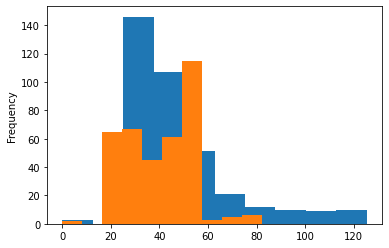

In [9]:
df['temperature'].plot.hist()
df['humidity'].plot.hist()

Looking at the histogram, the temperature and humidity sensors have their distinct ranges but give a sensor reading of 0 at times. These are outliers which we will need to remove.

In [10]:
df.loc[df["temperature"] == 0] #check which rows have temperature reading of 0

,timestamp,temperature,light_intensity,humidity,CO,NO2,C3H8,C4H1O,CH4,H2,C2H5OH,Label
24,31/3/2021 20:31,0.0,58,0.0,45.776,0.159,98265.867,31542.746,3712474.75,26.214,35.562,0
135,31/3/2021 20:50,0.0,642,56.7,44.866,0.227,40843.855,14967.979,3446819.25,25.423,34.635,0
213,31/3/2021 20:44,0.0,44,0.0,45.547,0.198,51243.520,18147.156,3644322.50,26.015,35.329,1


In [11]:
df.loc[df["humidity"] == 0] #check which rows have humidity reading of 0

,timestamp,temperature,light_intensity,humidity,CO,NO2,C3H8,C4H1O,CH4,H2,C2H5OH,Label
24,31/3/2021 20:31,0.0,58,0.0,45.776,0.159,98265.867,31542.746,3712474.75,26.214,35.562,0
213,31/3/2021 20:44,0.0,44,0.0,45.547,0.198,51243.520,18147.156,3644322.50,26.015,35.329,1


In [12]:
#drop rows for sensors with temperature and humidity anomalies
df = df.drop(index=[24,135,213])

In [13]:
len(df["timestamp"]) #check number of rows in this dataset again after dropping rows, should say 366 since 3 rows were dropped

366

In [24]:
X = df.iloc[:, 1:4] #Features to be used are only temperature, light intensity and humidity
X

,temperature,light_intensity,humidity
0,38.04,44,43.7
1,38.05,47,44.0
2,37.34,97,45.3
3,37.35,98,45.2
4,37.06,63,45.2
...,...,...,...
364,40.89,654,34.6
365,40.61,621,34.8
366,40.36,622,35.4
367,40.11,621,35.7


In [19]:
Y = df.iloc[:, 11:] #Labels
Y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
364,2
365,2
366,2
367,2


Separated the features and labels from the dataframe. Now we can split the training and test sets.

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

In [80]:
clf = SVC(C=1e4, kernel='rbf', random_state=100, gamma='scale',probability=True)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9363636363636364

In [26]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, Y_train)
clf2.score(X_train, Y_train)

1.0

[Text(189.72, 201.90857142857143, 'X[0] <= 36.795\ngini = 0.646\nsamples = 256\nvalue = [86, 59, 111]'),
 Text(89.28, 170.84571428571428, 'X[2] <= 44.85\ngini = 0.089\nsamples = 87\nvalue = [83, 2, 2]'),
 Text(44.64, 139.78285714285715, 'X[1] <= 407.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(22.32, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(133.92000000000002, 139.78285714285715, 'X[2] <= 54.1\ngini = 0.046\nsamples = 84\nvalue = [82, 0, 2]'),
 Text(111.6, 108.72, 'gini = 0.0\nsamples = 65\nvalue = [65, 0, 0]'),
 Text(156.24, 108.72, 'X[0] <= 33.335\ngini = 0.188\nsamples = 19\nvalue = [17, 0, 2]'),
 Text(133.92000000000002, 77.65714285714284, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0]'),
 Text(178.56, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(290.16, 170.84571428571428, 'X[1] <= 109.5\ngini = 0.47\nsamples = 169\nvalue = [3, 57, 109]'),
 Text

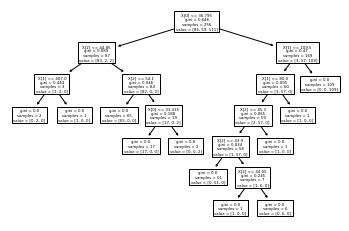

In [27]:
tree.plot_tree(clf2)

In [78]:
Example = [[36, 30, 50.0]] #Normal but server drawer not pulled out
Example1 = [[36, 600, 50.0]] #Normal but drawer pulled out
Example2 = [[70, 30, 45.0]] #Overheat since higher temps than example 1 but light remains the same
Example3 = [[90, 600, 22.0]] #Fire since temps and light are high, humidity drops due to dryer air

In [35]:
def Classifier_DecisionTree (Data):
    Label = clf2.predict(Data)
    Label = Label[0] #Used this to get the int value from the 1D list
    Dict = {0: 'Normal', 1: 'Overheat', 2: 'Fire'}
    Class = Dict.get(Label)
    print(Label, Class)

In [79]:
Classifier_DecisionTreeExample)
Classifier_DecisionTreeExample1)
Classifier_DecisionTree(Example2)
Classifier_DecisionTree(Example3)

0 Normal
0 Normal
1 Overheat
2 Fire


In [81]:
def Classifier_SVM (Data):
    Label = clf.predict(Data)
    Label = Label[0] #Used this to get the int value from the 1D list
    Dict = {0: 'Normal', 1: 'Overheat', 2: 'Fire'}
    Class = Dict.get(Label)
    print(Label, Class)

Classifier_SVM(Example)
Classifier_SVM(Example1)
Classifier_SVM(Example2)
Classifier_SVM(Example3)

0 Normal
2 Fire
1 Overheat
2 Fire
